In [2]:
from sim.star_img_sim import star_img_sim
import numpy as np
from math import radians, sqrt
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
import time 
import argparse
import os

num of dark frames currently in folder = 1000
[[461.04499494 261.23048594]
 [600.96190055 262.82273925]
 [586.57457376 302.0924211 ]
 [565.2223022  360.105371  ]
 [ 56.40962572   6.22335699]
 [236.91413589  30.64060026]
 [157.23583786  81.46705573]
 [448.80684899  99.60025868]
 [269.86286783 117.25075797]
 [183.41469462 146.46237254]
 [467.09318635 157.68650809]
 [314.91522706 179.20653195]
 [485.73849782 224.54347361]]


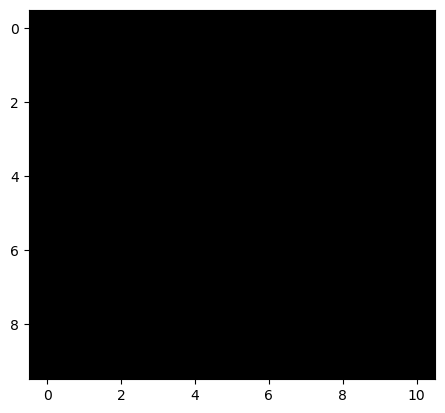

In [74]:
dark_frames_dir = "./dark_frames_straylight"
star_img_sim_obj = star_img_sim(camera_noise_flag=True, dark_frames_dir=dark_frames_dir)
# q: rotation from inertial to star tracker body frame    
#q = np.array([0, 0, 0, 1])
q = np.array([0.707, 0, 0.707, 0])  
#q = np.array([0, -0.707, 0, 0.707])
#q = np.array([0.5, -0.5, 0.5, 0.5])
star_img_sim_obj.sigma_psf = 0.75
star_img_raw, centroid_mm = star_img_sim_obj.generate_star_image(q, np.array([0,0,0]), 0.1)

centroid = np.asarray(centroid_mm)[:,0:2]
window_width = 5
sub_image = star_img_raw[219-window_width:219+window_width, 293-window_width:293+window_width+1]
print( centroid/(6/1000) )
plt.imshow(sub_image, cmap='gray', interpolation='none' )
plt.show()

In [92]:
# to crop images
center = star_img_raw.shape 
cropped_factor = 4
h = 480
w = 640
x = int(center[1]/2 - w/cropped_factor)
y = int(center[0]/2 - h/cropped_factor) 

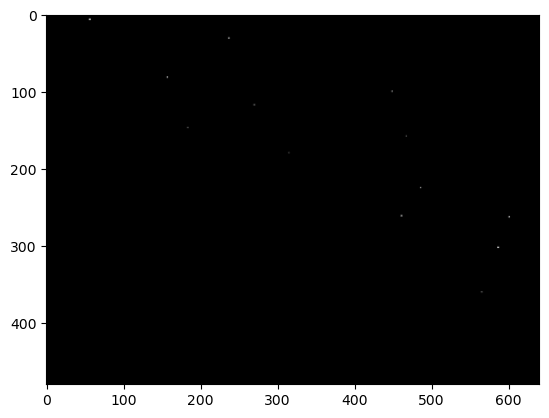

In [75]:
plt.imshow(star_img_raw, cmap='gray', interpolation='none' )
plt.show()

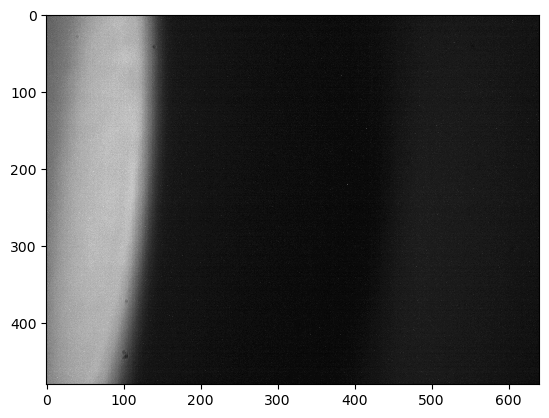

In [126]:
noise = star_img_sim_obj.noise_from_camera()
plt.imshow(noise, cmap='gray', interpolation='none' )
plt.show()

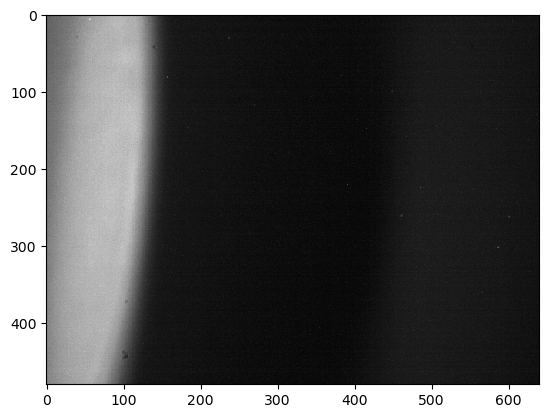

In [127]:
star_image_dig = star_img_sim_obj.adc(star_img_raw)

star_image_noise = star_image_dig.astype('float64') + noise.astype('float64')
plt.imshow(star_image_noise, cmap='gray', interpolation='none' )
plt.show()

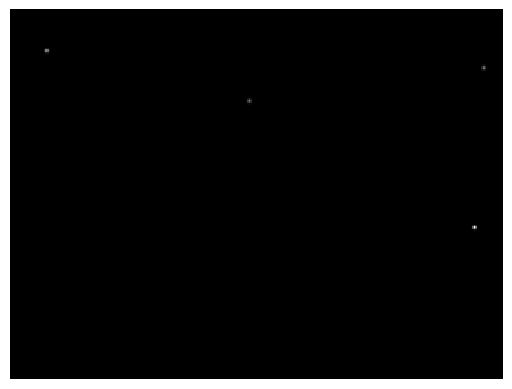

In [123]:
# cropped clean
star_img_raw_c = star_img_raw[y:int(y+h/(cropped_factor/2)), x:int(x+w/(cropped_factor/2))]
plt.imshow(star_img_raw_c, cmap='gray', interpolation='none' )
plt.axis('off')
plt.savefig('cropped_clean', bbox_inches='tight', pad_inches=0)
plt.show()

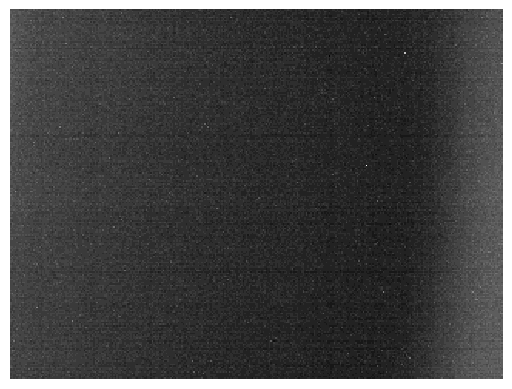

In [129]:
# cropped noise
noise_c = noise[y:int(y+h/(cropped_factor/2)), x:int(x+w/(cropped_factor/2))]
plt.imshow(noise_c, cmap='gray', interpolation='none' )
plt.axis('off')
plt.savefig('cropped_noise', bbox_inches='tight', pad_inches=0)
plt.show()

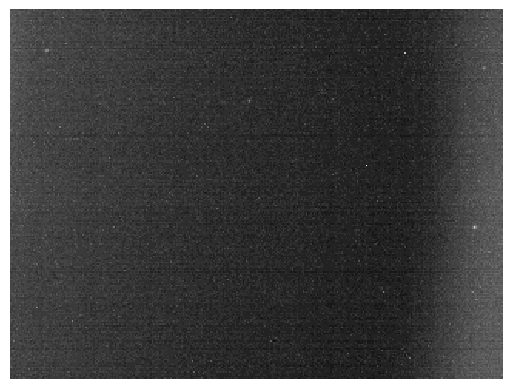

In [128]:
# cropped combined
star_image_noise_c = star_image_noise[y:int(y+h/(cropped_factor/2)), x:int(x+w/(cropped_factor/2))]
plt.imshow(star_image_noise_c, cmap='gray', interpolation='none' )
plt.axis('off')
plt.savefig('cropped_combined', bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
# get distance map
dist_map = star_img_sim_obj.generate_distance_map(centroid_mm)

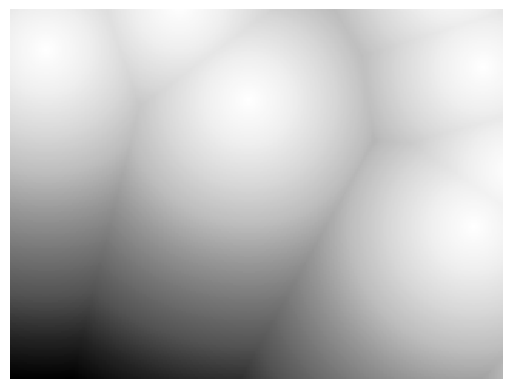

In [119]:
dist_map_c = dist_map[y:int(y+h/(cropped_factor/2)), x:int(x+w/(cropped_factor/2))]
plt.imshow(dist_map_c, cmap='gray', interpolation='none' )
plt.axis('off')
plt.savefig('cropped_dist', bbox_inches='tight', pad_inches=0)
plt.show()

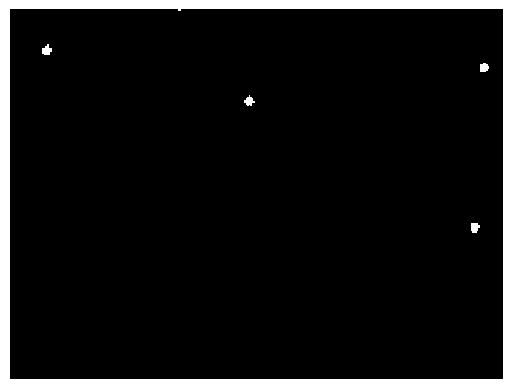

In [118]:
# plot seg 
plt.imshow(star_img_raw_c > 0, cmap='gray', interpolation='none' )
plt.axis('off')
plt.savefig('cropped_seg', bbox_inches='tight', pad_inches=0)
plt.show()